# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Logistic Regression (Best Treshold) </b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |

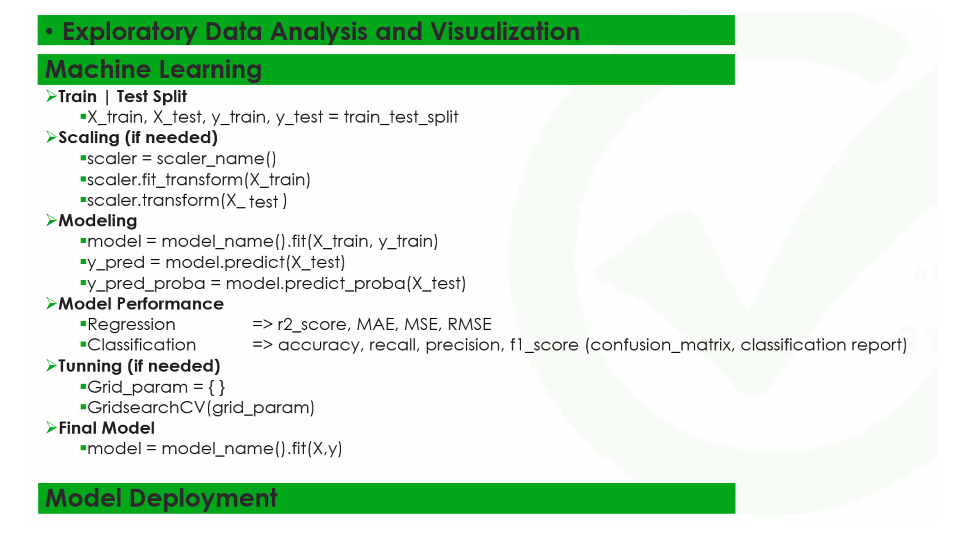

# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# pd.set_option('display.float_format', lambda x: '%.3f' % x)
# pd.options.display.float_format = '{:.3f}'.format

Bu veri seti, Arizona'da yaşayan Pima Kızılderili kadınları üzerinde yapılan diyabet çalışmalarından elde edilen verileri içerir.

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Veri seti aşağıdaki özellikleri içermektedir:

   1. **Pregnancies:** Hamilelik sayısı.<br>
   2. **Glucose:** Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu.<br>
   3. **Blood Pressure:** Kan basıncı (mm Hg).<br>
   4. **Skin Thickness:** Triceps deri kıvrım kalınlığı (mm).<br>
   5. **Insulin:** 2 saatlik serum insülini (mu U/ml).<br>
   6. **BMI:** Vücut kitle indeksi (ağırlık kg/(boy m)^2).<br>
   7. **Diabetes Pedigree Function:** Diyabet soyağacı fonksiyonu, aile geçmişine dayalı diyabet olasılığını belirleyen bir fonksiyon.<br>
   8. **Age:** Yaş (yıl).<br>
   9. **Outcome:** Sınıf etiketi (0 veya 1), kişinin diyabet hastası olup olmadığını gösterir. 1 diyabet hastası olduğunu, 0 ise olmadığını belirtir.<br>

Bu veri seti, makine öğrenimi algoritmalarını eğitmek ve diyabet hastalığının tahmin edilmesi gibi ikili sınıflandırma problemlerinde kullanılmak üzere yaygın bir şekilde kullanılır. Veri seti, özellikle veri önişleme, özellik mühendisliği ve sınıflandırma algoritmalarının performanslarının karşılaştırılması gibi konularda kullanılır.

Veri setinin kullanıldığı tipik uygulamalar arasında, hangi hasta profillerinin diyabet riski taşıdığını anlamak, hangi özelliklerin diyabet olasılığını artırdığını belirlemek ve diyabet teşhisinin otomatik olarak konmasına yardımcı olacak tahmin modelleri geliştirmek bulunur.

Veri setinin doğası gereği, bazı özelliklerin eksik olabileceği veya dengesiz bir sınıf dağılımına sahip olabileceği gibi zorluklar içerebileceğini unutmamak önemlidir. Bu tür zorluklar, veri temizleme, eksik veri imputasyonu, dengesiz veri setlerini ele alma ve model doğrulama teknikleri gibi makine öğrenimi konularını derinlemesine inceleme fırsatı sunar.

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.Outcome.value_counts()

# Classification problemlerinde sıklıkla karşılaşılan problemlerden biri de inbalanced datalardır. 
# Sayısı az olan classın doğal olarak gözlem sayısı da az olduğundan modelin bu gözlemlerden yapabildiği öğrenme, sayısı çok olan sınıfa nazaran genellikle daha zayıf kalmakta ve ilgili classa ait scorlar daha düşük çıkabilmektedir.

# Az olan classın scorlarını düzeltmek/dengelemek için yapılabilecek işlemlerin detayına aşağıda gireceğiz.

# ÖNEMLİ NOT: inbalanced olan tüm datalarda az olan classın scorları kötü çıkmaz. 
# Bazı datalarda az olan classların skorları da çok iyi çıkabilir.
# Data az olmasına rağmen classı çok iyi tanımladığından az olan veriler bile eğitim için yeterli olabilir.
# Bu durumlarda az olan classın scorlarını düzeltmeye/dengelemeye gerek yoktur.

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df.Outcome.value_counts(normalize = True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

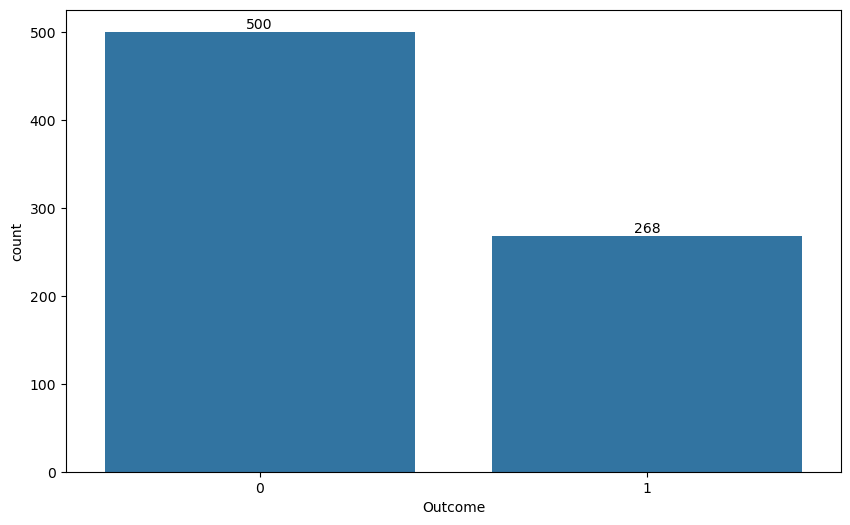

In [9]:
ax = sns.countplot(x='Outcome', data=df)
ax.bar_label(ax.containers[0]);

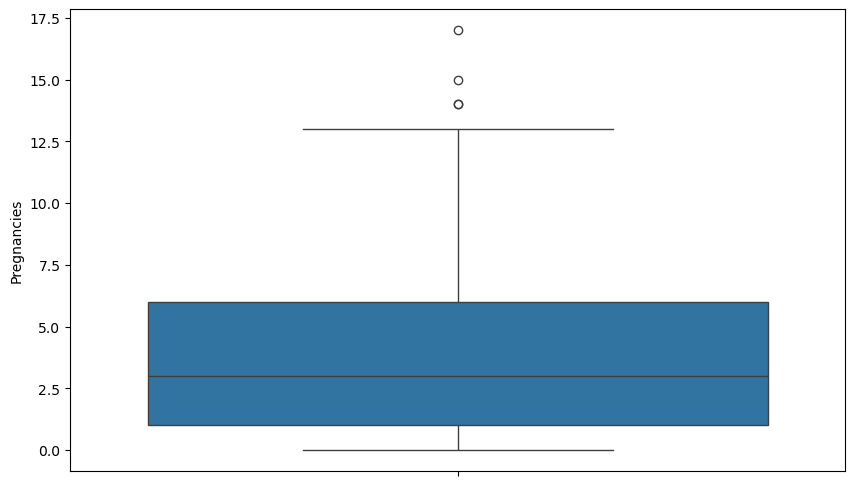

In [10]:
sns.boxplot(df.Pregnancies);

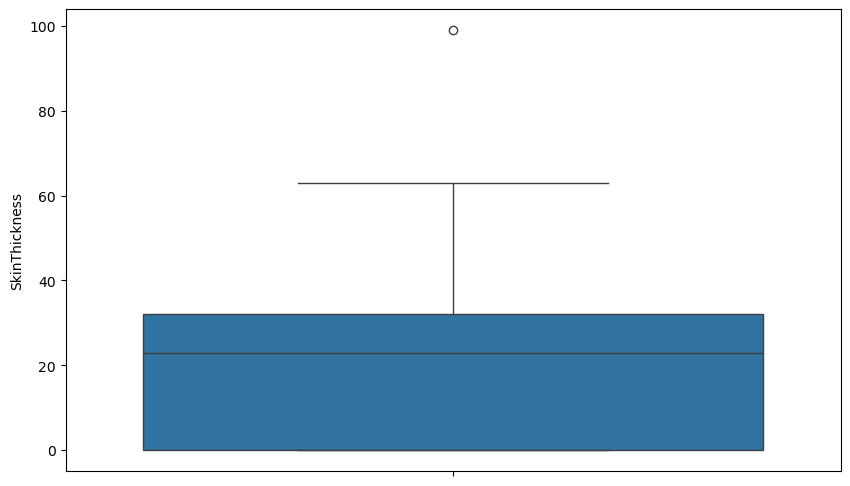

In [11]:
sns.boxplot(df.SkinThickness);

In [12]:
df = df[df.SkinThickness<70]

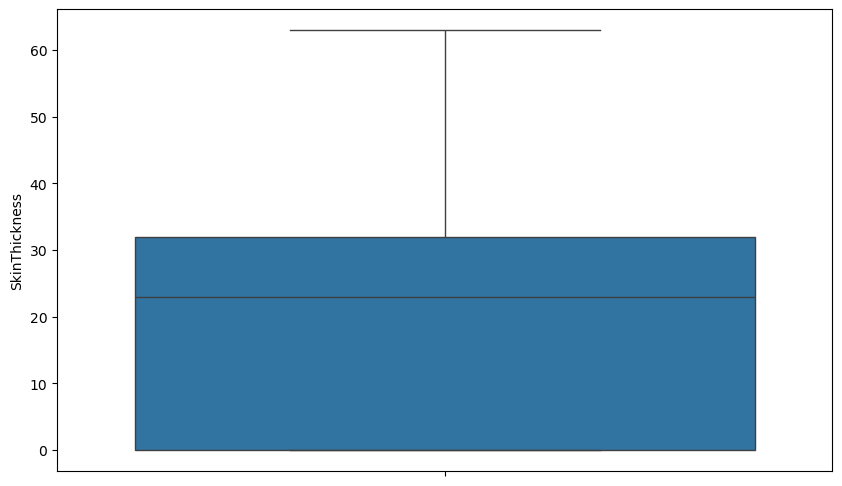

In [13]:
sns.boxplot(df.SkinThickness);

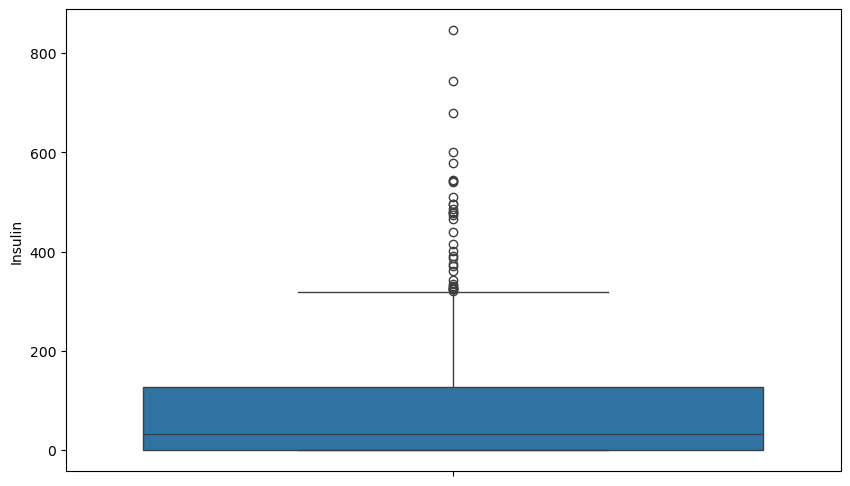

In [14]:
sns.boxplot(df.Insulin);

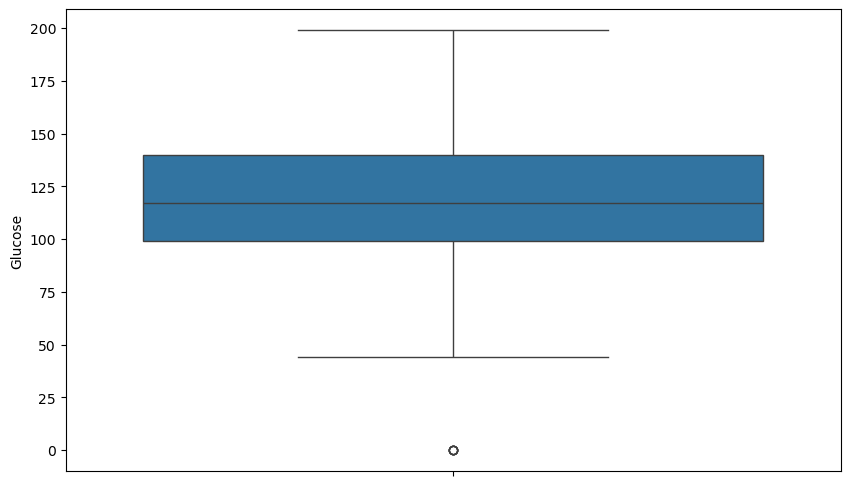

In [15]:
sns.boxplot(df.Glucose);

In [16]:
df = df[df.Glucose>0]

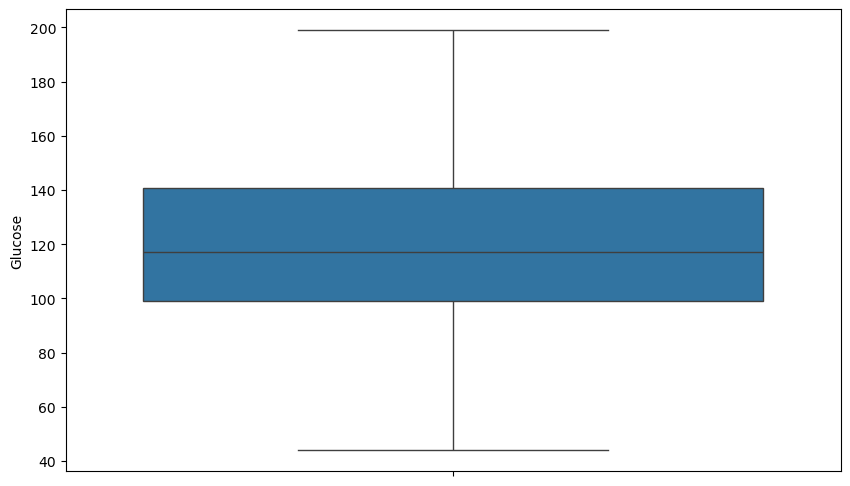

In [17]:
sns.boxplot(df.Glucose);

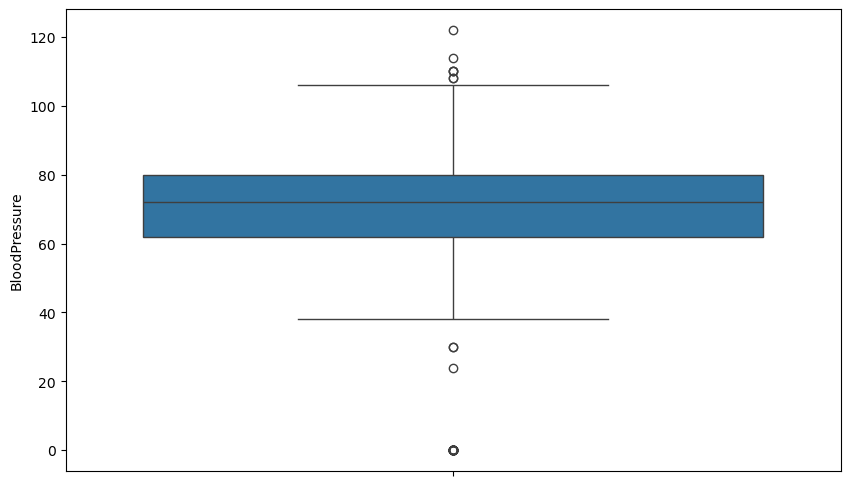

In [18]:
sns.boxplot(df.BloodPressure);

In [19]:
df = df[df.BloodPressure>35]

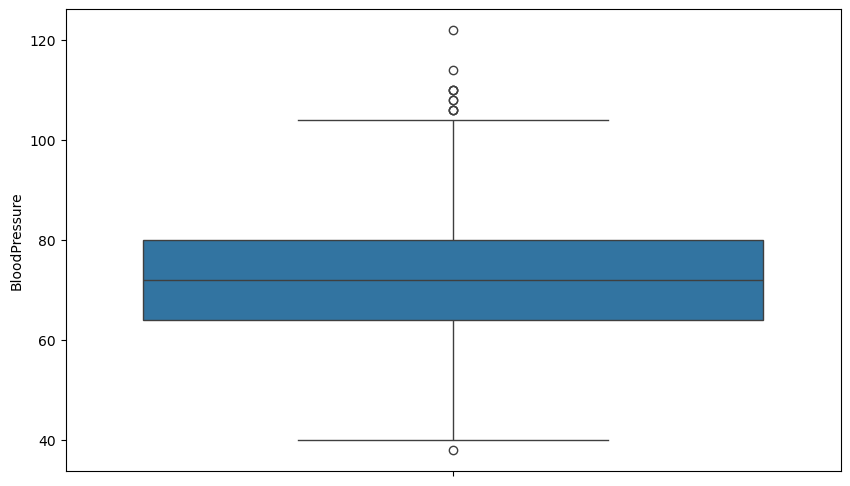

In [20]:
sns.boxplot(df.BloodPressure);

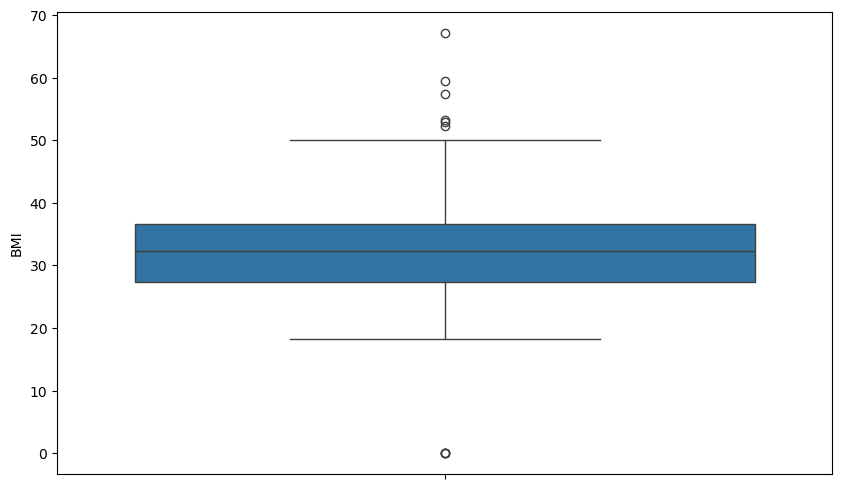

In [21]:
sns.boxplot(df.BMI);

In [22]:
df = df[df.BMI>0]

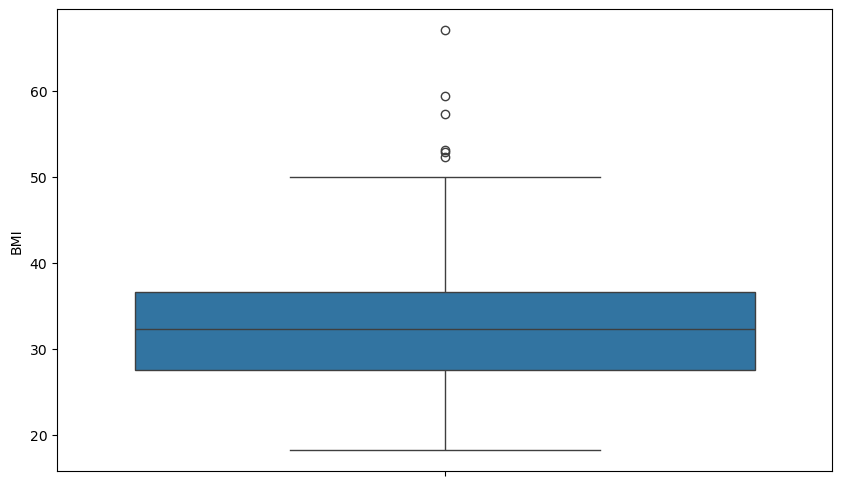

In [23]:
sns.boxplot(df.BMI);

In [24]:
df.shape  

(720, 9)

In [25]:
df.Outcome.value_counts() 

Outcome
0    473
1    247
Name: count, dtype: int64

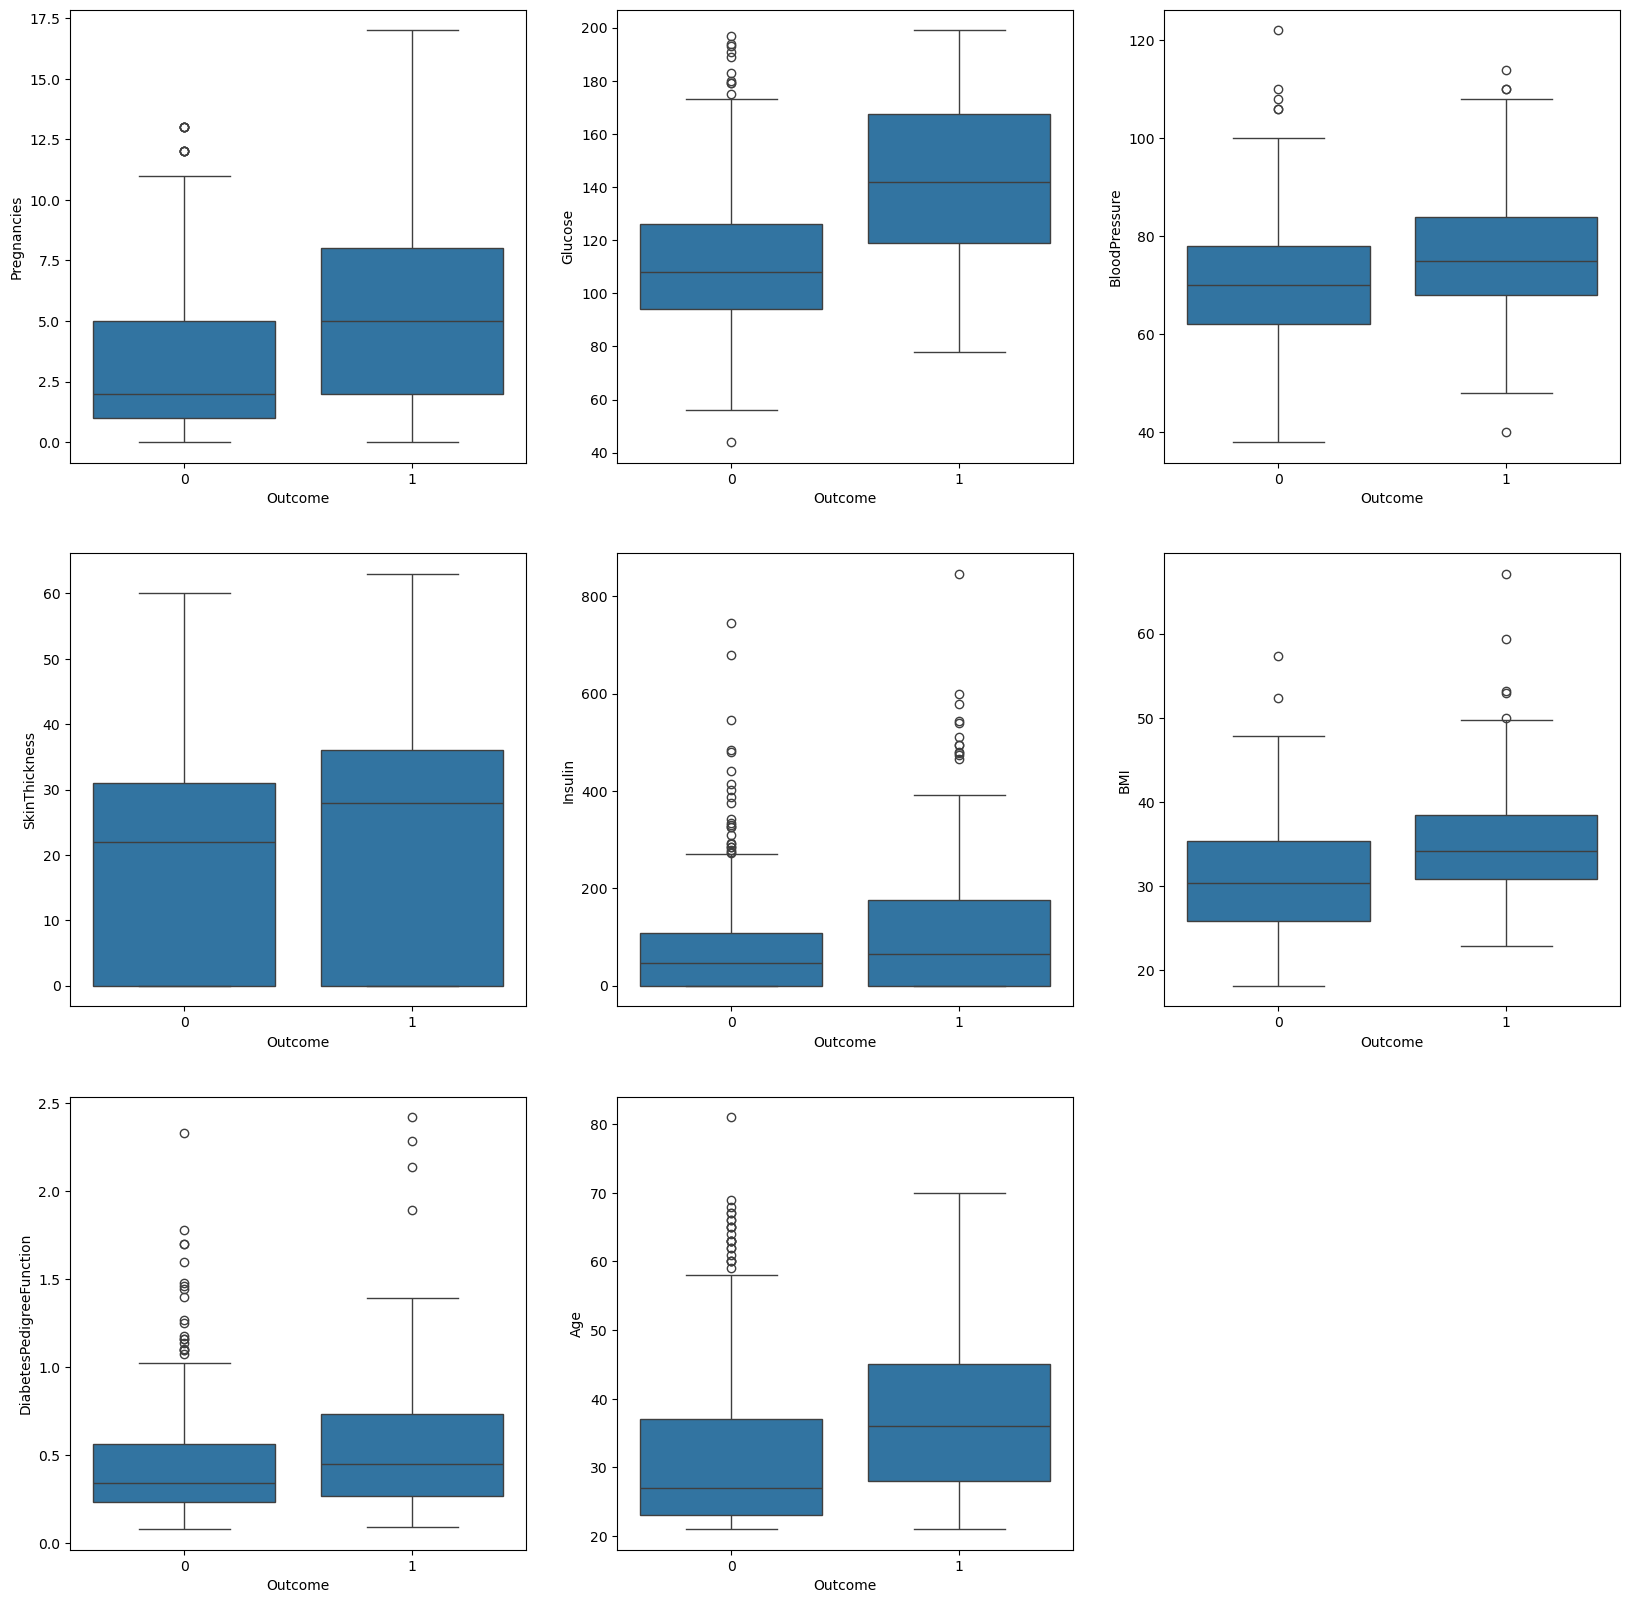

In [26]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

In [27]:
import plotly.express as px
plt.figure(figsize=(10,8))

fig = px.imshow(df.corr(), text_auto='.2f', aspect="auto", color_continuous_scale='RdBu_r')
fig.show()

<Figure size 1000x800 with 0 Axes>

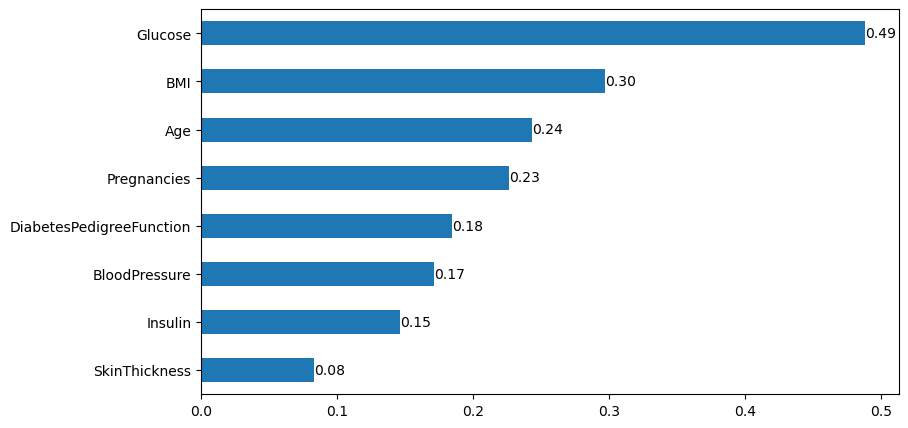

In [28]:
plt.figure(figsize=(9,5))
ax = df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');

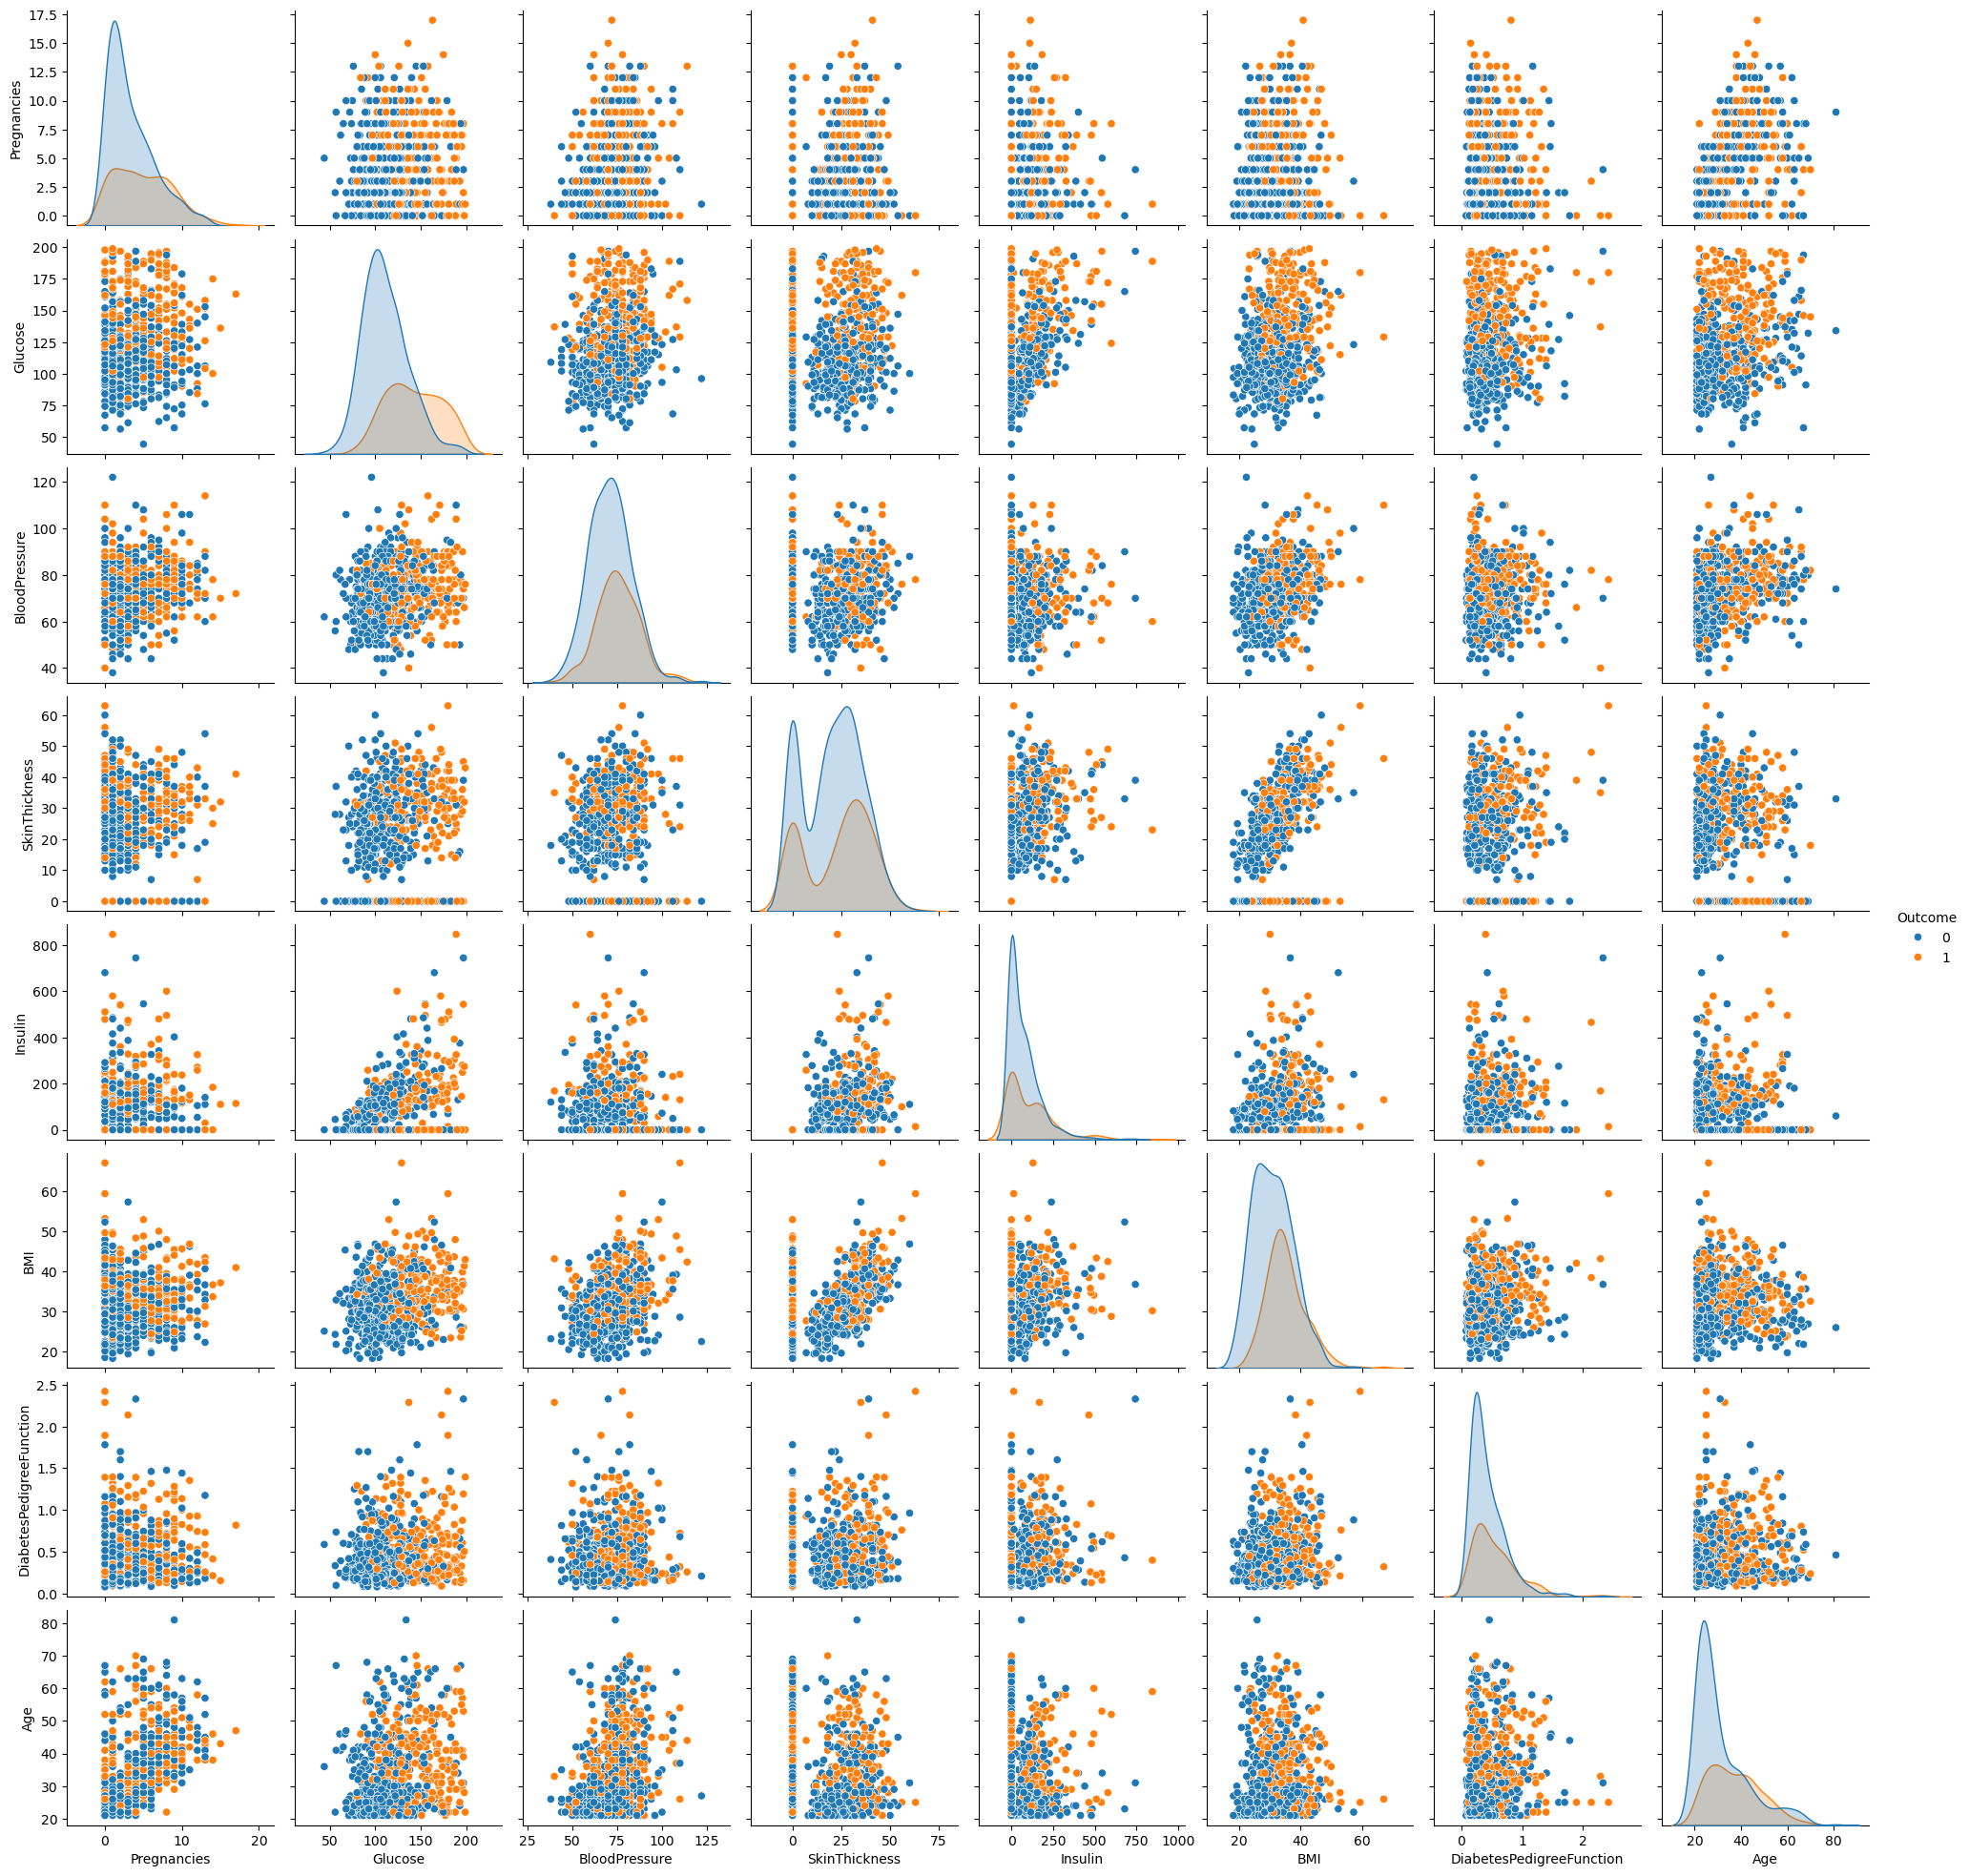

In [29]:
sns.pairplot(df, hue = "Outcome");

# Train | Test Split

In [30]:
X = df.drop("Outcome", axis=1)
y = df.Outcome

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
# without stratify_y

X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.20, random_state=42)

print(y_train_.value_counts(normalize=True))
print()
print(y_test_.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Outcome
0    0.680556
1    0.319444
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# classification datalarını train ve test setlerine ayırırken eğer datamız inbalanced ise stratify=y parametresini mutlaka kullanmalıyız. 
# Stratify parametresi 0 ve 1 classlarının birbirine olan oranını hem train datasında hemde test datasında korur.

# Inbalanced datalarda bu parametre kullanılmaz ise az olan class train veya test setine dengesiz bir şekilde dağıtılabilir. Bu da doğal olarak inbalanced olan classın scorlarını düşürür.

# Datanız balanced da olsa inbalanced da olsa hepsinde stratify=y kullanabilirsiniz.

In [34]:
# eğitim ve test verilerinde stratify_y ile hedef özellikteki her sınıfın oranı

print(y_train.value_counts(normalize=True))
print()
print(y_test.value_counts(normalize=True))
print()
print(y.value_counts(normalize=True))

Outcome
0    0.65625
1    0.34375
Name: proportion, dtype: float64

Outcome
0    0.659722
1    0.340278
Name: proportion, dtype: float64

Outcome
0    0.656944
1    0.343056
Name: proportion, dtype: float64


# Modelling

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# pipelinemızı kuruyoruz.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [37]:
y_pred = pipe_model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
y_pred_proba = pipe_model.predict_proba(X_test)
y_pred_proba

array([[0.23367936, 0.76632064],
       [0.11960923, 0.88039077],
       [0.58160166, 0.41839834],
       [0.81462592, 0.18537408],
       [0.19181772, 0.80818228],
       [0.91051658, 0.08948342],
       [0.7639345 , 0.2360655 ],
       [0.13932957, 0.86067043],
       [0.97125901, 0.02874099],
       [0.88970007, 0.11029993],
       [0.71503222, 0.28496778],
       [0.75805504, 0.24194496],
       [0.82996045, 0.17003955],
       [0.81260234, 0.18739766],
       [0.0974634 , 0.9025366 ],
       [0.98344478, 0.01655522],
       [0.84875214, 0.15124786],
       [0.30126046, 0.69873954],
       [0.62398487, 0.37601513],
       [0.92736542, 0.07263458],
       [0.54071098, 0.45928902],
       [0.97778171, 0.02221829],
       [0.22511415, 0.77488585],
       [0.88700925, 0.11299075],
       [0.76148606, 0.23851394],
       [0.69324508, 0.30675492],
       [0.89994734, 0.10005266],
       [0.57209896, 0.42790104],
       [0.73984559, 0.26015441],
       [0.8399177 , 0.1600823 ],
       [0.

In [39]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1] # 1 sınıfına ait olma olasılıkları
test_data.sample(10)

# test datamıza pred ve pred_proba featurlarını ilave ederek 
# modelin prediction işlemini nasıl yaptığını tekrar gözlemliyoruz.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
330,8,118,72,19,0,23.1,1.476,46,0,0,0.452883
441,2,83,66,23,50,32.2,0.497,22,0,0,0.077032
53,8,176,90,34,300,33.7,0.467,58,1,1,0.803776
699,4,118,70,0,0,44.5,0.904,26,0,1,0.659919
34,10,122,78,31,0,27.6,0.512,45,0,0,0.425908
451,2,134,70,0,0,28.9,0.542,23,1,0,0.291156
585,1,93,56,11,0,22.5,0.417,22,0,0,0.043988
561,0,198,66,32,274,41.3,0.502,28,1,1,0.880391
368,3,81,86,16,66,27.5,0.306,22,0,0,0.035020
82,7,83,78,26,71,29.3,0.767,36,0,0,0.130079


In [40]:
test_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pred,pred_proba
46,1,146,56,0,0,29.7,0.564,29,0,0,0.427901
705,6,80,80,36,0,39.8,0.177,28,0,0,0.161480
122,2,107,74,30,100,33.6,0.404,23,0,0,0.151248
725,4,112,78,40,0,39.4,0.236,38,0,0,0.340937
0,6,148,72,35,0,33.6,0.627,50,1,1,0.706151
89,1,107,68,19,0,26.5,0.165,24,0,0,0.072635
163,2,100,64,23,0,29.7,0.368,21,0,0,0.105976
406,4,115,72,0,0,28.9,0.376,46,1,0,0.208086
138,0,129,80,0,0,31.2,0.703,29,0,0,0.256699
330,8,118,72,19,0,23.1,1.476,46,0,0,0.452883


## Model Performance on Classification Tasks

In [41]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

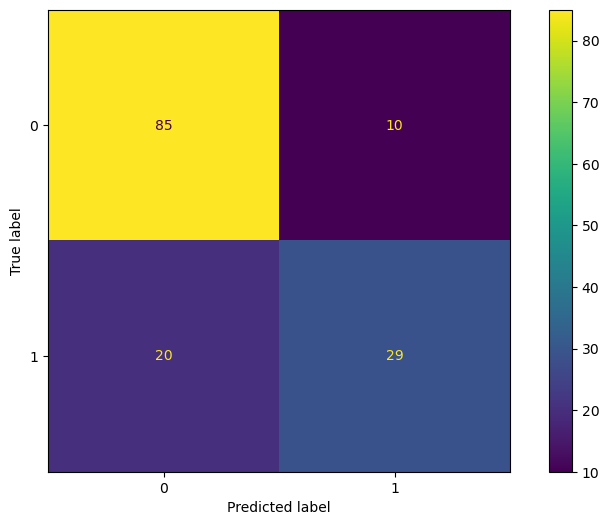

In [42]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test)

In [43]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [44]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[85 10]
 [20 29]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        95
           1       0.74      0.59      0.66        49

    accuracy                           0.79       144
   macro avg       0.78      0.74      0.75       144
weighted avg       0.79      0.79      0.79       144


Train_Set
[[337  41]
 [ 89 109]]
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       378
           1       0.73      0.55      0.63       198

    accuracy                           0.77       576
   macro avg       0.76      0.72      0.73       576
weighted avg       0.77      0.77      0.77       576



## Cross Validate

In [45]:
from sklearn.model_selection import cross_validate, StratifiedKFold

In [46]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10) # her iterasyonda train ve test setlerinin birbirlerine olan oranlarına göre tüm 
                                  # iterasyonlarda ayrışım yapar.

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], # 1 sınıfının scorelarını max. eder.
                        cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1,11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.184196,0.066437,0.600000,0.718310,0.450000,0.573034,0.514286,0.637500,0.706897,0.776062
2,0.031467,0.048902,0.642857,0.744526,0.450000,0.573034,0.529412,0.647619,0.724138,0.785714
3,0.016073,0.026666,0.923077,0.717557,0.600000,0.528090,0.727273,0.608414,0.844828,0.766409
4,0.016847,0.040016,0.857143,0.716418,0.600000,0.539326,0.705882,0.615385,0.827586,0.768340
5,0.017230,0.079631,0.705882,0.727941,0.600000,0.556180,0.648649,0.630573,0.775862,0.776062
6,0.101059,0.109089,0.647059,0.727941,0.550000,0.556180,0.594595,0.630573,0.741379,0.776062
7,0.031780,0.028692,0.714286,0.723881,0.526316,0.541899,0.606061,0.619808,0.771930,0.770713
8,0.019546,0.029032,0.647059,0.719424,0.578947,0.558659,0.611111,0.628931,0.754386,0.772640
9,0.018105,0.019145,0.750000,0.698529,0.600000,0.533708,0.666667,0.605096,0.789474,0.761079
10,0.011379,0.022954,0.625000,0.729927,0.500000,0.561798,0.555556,0.634921,0.719298,0.778420


In [47]:
df_scores.mean()[2:]

test_precision     0.711236
train_precision    0.722445
test_recall        0.545526
train_recall       0.552191
test_f1            0.615949
train_f1           0.625882
test_accuracy      0.765578
train_accuracy     0.773150
dtype: float64

## Cross Validate for 0 class

In [48]:
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

f1_0 = make_scorer(f1_score, pos_label =0)
precision_0 = make_scorer(precision_score, pos_label =0)
recall_0 = make_scorer(recall_score, pos_label =0)

scoring = {"precision_0":precision_0, "recall_0":recall_0, "f1_0":f1_0}

In [49]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

cv = StratifiedKFold(n_splits=10)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = cv, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision_0,train_precision_0,test_recall_0,train_recall_0,test_f1_0,train_f1_0
1,0.038160,0.036581,0.744186,0.797872,0.842105,0.882353,0.790123,0.837989
2,0.067945,0.033997,0.750000,0.800525,0.868421,0.897059,0.804878,0.846047
3,0.015453,0.034867,0.822222,0.782946,0.973684,0.891176,0.891566,0.833563
4,0.015081,0.033040,0.818182,0.786458,0.947368,0.888235,0.878049,0.834254
5,0.019281,0.022815,0.804878,0.793194,0.868421,0.891176,0.835443,0.839335
6,0.017019,0.027916,0.780488,0.793194,0.842105,0.891176,0.810127,0.839335
7,0.023506,0.036350,0.790698,0.787013,0.894737,0.891176,0.839506,0.835862
8,0.023280,0.036601,0.800000,0.792105,0.842105,0.885294,0.820513,0.836111
9,0.212842,0.067105,0.804878,0.783290,0.891892,0.879765,0.846154,0.828729
10,0.020812,0.028952,0.756098,0.795812,0.837838,0.891496,0.794872,0.840941


In [50]:
df_scores.mean()[2:]

test_precision_0     0.787163
train_precision_0    0.791241
test_recall_0        0.880868
train_recall_0       0.888891
test_f1_0            0.831123
train_f1_0           0.837217
dtype: float64

## GridSearchCV

[Logistic Regression Hyperparametreleri](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [51]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'deprecated',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [52]:
pipe_model.set_params(logistic__C = 0.5)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression(C=0.5))])

In [53]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('logistic', LogisticRegression(C=0.5))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(C=0.5),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 0.5,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'deprecated',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20) # katsayı için logspace alınarak değerler verilmesi öneriliyor
class_weight= ["balanced", None] # unbalance varsa düzeltecek

# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. 
# Data dengelendiği zaman model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data
solver = ["lbfgs", "liblinear", "sag", "saga"] # default olarak lbfgs çok değiştirilmez.hepsini görmek için verdik 

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}



cv = StratifiedKFold(n_splits = 10) #shuffle = True, random_state = 42

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",   # Default olarak 1 sınıfının scorunu max. eder. 0 sınıfınınkini max. etmek isterseniz f1_0 = make_scorer(f1_score, pos_label =0)
                          n_jobs = -1,
                          return_train_score=True)

# GrdiseachCV aynı zamanda Cross Validation işlemi de yaptığı için validation ve train seti scorlarını elde edebilmek için
# return_train_score=True olarak belirtiyoruz. (scoring karşına yazdığımız metric scorunu döndürür sadece)

In [56]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [57]:
grid_model.best_params_

{'logistic__C': np.float64(0.1),
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [58]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=np.float64(0.1), class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

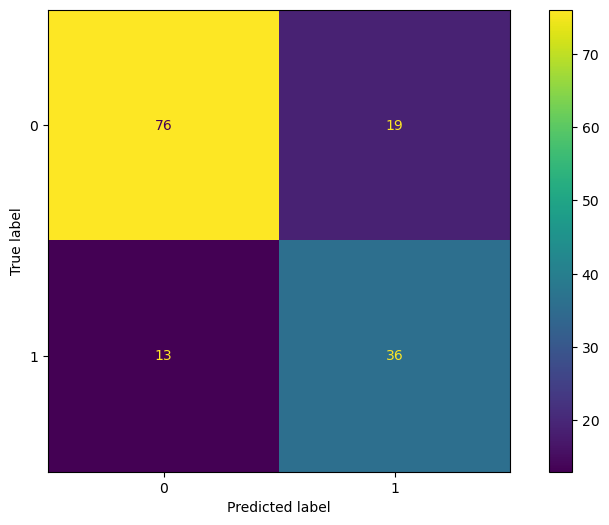

In [59]:
ConfusionMatrixDisplay.from_estimator(grid_model,X_test,y_test)

In [60]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[76 19]
 [13 36]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        95
           1       0.65      0.73      0.69        49

    accuracy                           0.78       144
   macro avg       0.75      0.77      0.76       144
weighted avg       0.79      0.78      0.78       144


Train_Set
[[288  90]
 [ 49 149]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       378
           1       0.62      0.75      0.68       198

    accuracy                           0.76       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.78      0.76      0.76       576



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

[Threshold Optimization](https://towardsdatascience.com/calculating-and-setting-thresholds-to-optimise-logistic-regression-performance-c77e6d112d7el)

In [61]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

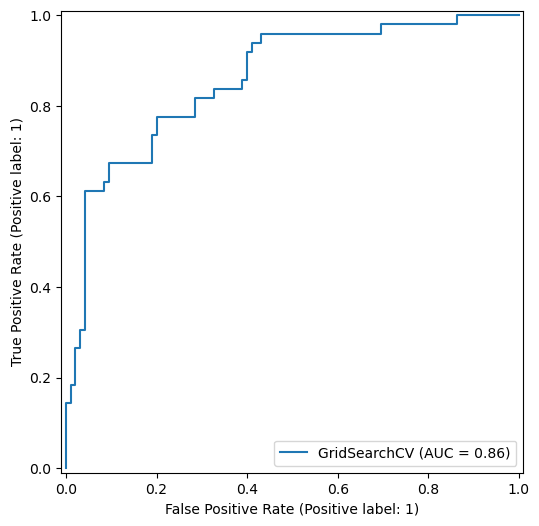

In [62]:
RocCurveDisplay.from_estimator(grid_model,X_test,y_test)

## Precision Recall Curve

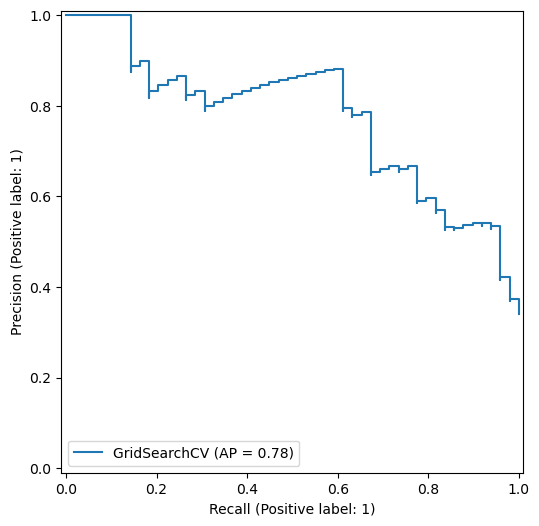

In [63]:
PrecisionRecallDisplay.from_estimator(grid_model,X_test,y_test)

# Finding Best Thresholds

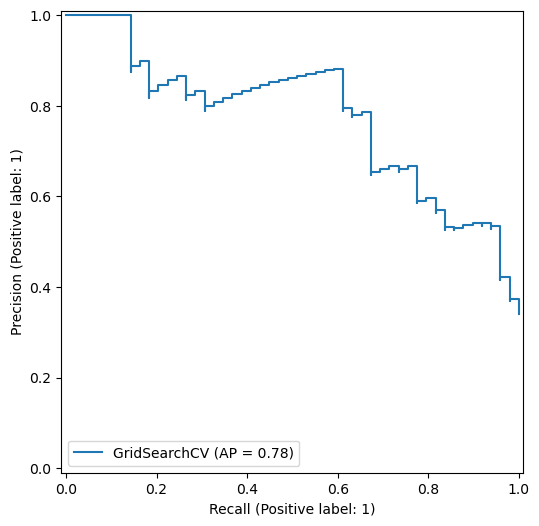

In [64]:
PrecisionRecallDisplay.from_estimator(grid_model,X_test,y_test)

In [65]:


y_train_pred_proba = grid_model.predict_proba(X_train) # train datası üzerinden treshold belirliyoruz.
average_precision_score(y_train, y_train_pred_proba[:,1])



np.float64(0.7039749907641873)

In [66]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred_proba[:,1])

In [67]:
print("precision :", len(precisions))
print("recall    :", len(recalls))
print("threshold :", len(thresholds)) 

precision : 577
recall    : 577
threshold : 576


In [68]:
dict = {"precisions":precisions[:-1], "recalls":recalls[:-1], "threshold":thresholds}
df_metric = pd.DataFrame(dict).sort_values(by = ["recalls", "precisions"], ascending=False)
df_metric

,precisions,recalls,threshold
115,0.429501,1.000000,0.224452
114,0.428571,1.000000,0.222727
113,0.427646,1.000000,0.221422
112,0.426724,1.000000,0.217901
111,0.425806,1.000000,0.216197
...,...,...,...
571,0.600000,0.015152,0.963333
573,0.666667,0.010101,0.969833
572,0.500000,0.010101,0.964121
575,1.000000,0.005051,0.988412


In [69]:
df_metric[:1]

,precisions,recalls,threshold
115,0.429501,1.0,0.224452


In [70]:
optimal_threshold = 	0.224452

In [71]:
class_1_proba = grid_model.predict_proba(X_test)[:,1]
class_1_proba

array([0.86113186, 0.91895209, 0.54015659, 0.32834503, 0.84586238,
       0.19020931, 0.37229939, 0.89304099, 0.09180066, 0.23758505,
       0.42218193, 0.40054134, 0.32152696, 0.29623005, 0.91147095,
       0.04581688, 0.31483997, 0.77838261, 0.6068363 , 0.17502015,
       0.59126969, 0.07183828, 0.85619713, 0.26772629, 0.35899824,
       0.42663723, 0.21360712, 0.54007854, 0.47724721, 0.26626555,
       0.32223123, 0.47416184, 0.59969208, 0.29605872, 0.92993374,
       0.16408018, 0.56707102, 0.37507248, 0.66446434, 0.17884375,
       0.22573787, 0.10909557, 0.11563089, 0.7681605 , 0.45682345,
       0.48417956, 0.45125036, 0.84198459, 0.8986095 , 0.48442585,
       0.31847885, 0.22797929, 0.45358663, 0.06128442, 0.0859409 ,
       0.87896366, 0.65055875, 0.21426913, 0.72029627, 0.53913812,
       0.81873482, 0.62134806, 0.7600497 , 0.91816044, 0.84383241,
       0.17311772, 0.33796921, 0.36854585, 0.96338232, 0.10317914,
       0.50367041, 0.22026684, 0.76706819, 0.24151279, 0.65058

In [72]:
y_pred2 = [1 if i  >= optimal_threshold else 0 for i in class_1_proba]

In [73]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[29 66]
 [ 1 48]]
              precision    recall  f1-score   support

           0       0.97      0.31      0.46        95
           1       0.42      0.98      0.59        49

    accuracy                           0.53       144
   macro avg       0.69      0.64      0.53       144
weighted avg       0.78      0.53      0.51       144



In [74]:


class_1_proba_train = grid_model.predict_proba(X_train)[:,1]

y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in class_1_proba_train]

print(confusion_matrix(y_train, y_train_pred2))
print(classification_report(y_train, y_train_pred2))

[[115 263]
 [  0 198]]
              precision    recall  f1-score   support

           0       1.00      0.30      0.47       378
           1       0.43      1.00      0.60       198

    accuracy                           0.54       576
   macro avg       0.71      0.65      0.53       576
weighted avg       0.80      0.54      0.51       576



In [75]:
from sklearn.model_selection import StratifiedKFold

def CV(n, model, X, y, optimal_threshold=0.224456):
    skf = StratifiedKFold(n_splits = n) #shuffle = True, random_state = 42
    
    acc_scores = []
    test_pre_scores = []
    test_rec_scores = []
    test_f1_scores  = []
    
    train_pre_scores = []
    train_rec_scores = []
    train_f1_scores  = []
    
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        model = model
        model.fit(X_train, y_train)
        
        y_pred_proba = model.predict_proba(X_test)[:,1]
        y_pred2 = [1 if i >= optimal_threshold else 0 for i in y_pred_proba]
        
        
        y_train_pred_proba = model.predict_proba(X_train)[:,1]
        y_train_pred2 = [1 if i >= optimal_threshold else 0 for i in y_train_pred_proba]
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        
        test_pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        test_rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        test_f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
        
        train_pre_scores.append(precision_score(y_train, y_train_pred2, pos_label=1))
        train_rec_scores.append(recall_score(y_train, y_train_pred2, pos_label=1))
        train_f1_scores.append(f1_score(y_train, y_train_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>15,.2f}%  std {np.std(acc_scores)*100:.2f}%\n')
    
    print(f'Test_Precision-1 {np.mean(test_pre_scores)*100:>7,.2f}%  std {np.std(test_pre_scores)*100:.2f}%')
    print(f'Train_Precision-1 {np.mean(train_pre_scores)*100:>6,.2f}%  std {np.std(train_pre_scores)*100:.2f}%\n')
    
    print(f'Test_Recall-1 {np.mean(test_rec_scores)*100:>10,.2f}%  std {np.std(test_rec_scores)*100:.2f}%')
    print(f'Train_Recall-1 {np.mean(train_rec_scores)*100:>9,.2f}%  std {np.std(train_rec_scores)*100:.2f}%\n')
    
    print(f'Test_F1_score-1 {np.mean(test_f1_scores)*100:>8,.2f}%  std {np.std(test_f1_scores)*100:.2f}%')
    print(f'Train_F1_score-1 {np.mean(train_f1_scores)*100:>7,.2f}%  std {np.std(train_f1_scores)*100:.2f}%')
    
# optimal threshold için bildiğimiz classic Cross validation fonksiyonunu kullanamıyoruz. O yüzden burda manuel olarak yazdığımız kodu kullanıyoruz. 
# Scorlarla birlikte scorların standart sapamasına bakma sebebimiz, skorların birbirleriyle ne kadar benzer olduğunu görebilmek 

In [76]:
model = LogisticRegression(C=0.1, class_weight='balanced',penalty='l1', solver='liblinear')
CV(10, model, X_train, y_train)

Accuracy           41.13%  std 2.89%

Test_Precision-1   36.52%  std 1.55%
Train_Precision-1  36.77%  std 0.49%

Test_Recall-1      96.47%  std 4.51%
Train_Recall-1     97.03%  std 0.26%

Test_F1_score-1    52.97%  std 2.12%
Train_F1_score-1   53.33%  std 0.53%


# Final Model and Model Deployment

In [77]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression(C=0.1, class_weight='balanced',
                                                         penalty='l1', solver='liblinear'))]

final_model = Pipeline(steps=operations)

final_model.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [78]:
import pickle

In [79]:
pickle.dump(final_model, open("final_pipe_model", "wb"))

In [80]:
new_model = pickle.load(open("final_pipe_model","rb"))

In [81]:
my_dict = {"Pregnancies": [3, 4, 5],
           "Glucose": [100, 110, 120],
           "BloodPressure": [75, 80, 70],
           "SkinThickness": [30, 25, 20],
           "Insulin": [80, 120, 130],
           "BMI": [25, 35, 30],
           "DiabetesPedigreeFunction": [0.4, 0.5, 0.6],
           "Age": [30, 40, 35]
          }

In [82]:
sample = pd.DataFrame(my_dict)
sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3,100,75,30,80,25,0.4,30
1,4,110,80,25,120,35,0.5,40
2,5,120,70,20,130,30,0.6,35


In [83]:
sample_2 = sample.copy()

In [84]:
new_model.predict(sample)

array([0, 0, 0])

## New Predictions for optimal_threshols

In [85]:
def predict(model, X_test, optimal_threshold = 0.224456):
    
    predict_proba = model.predict_proba(X_test)
    
    prediction = [1 if i >= optimal_threshold else 0 for i in predict_proba[:,1]]
    
    return prediction

In [86]:
y_pred = predict(final_model, sample_2)
y_pred

[0, 1, 1]

In [87]:


predictions = new_model.predict(sample)
predictions_proba = new_model.predict_proba(sample)
predictions2 = [1 if i >= optimal_threshold else 0 for i in predictions_proba[:,1]]



In [88]:
sample["pred_proba"] = predictions_proba[:,1]
sample["pred_0.50"] = predictions
sample["pred_0.22"] = predictions2
sample


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,pred_proba,pred_0.50,pred_0.22
0,3,100,75,30,80,25,0.4,30,0.173909,0,0
1,4,110,80,25,120,35,0.5,40,0.444471,0,1
2,5,120,70,20,130,30,0.6,35,0.462020,0,1


# <p style="background-color:green;font-family:newtimeroman;font-size:100%;color:white;text-align:center;border-radius:20px 20px;"><b>Faydalı Olması Temennisiyle Teşekkürler</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [WhatsApp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |